# Assignment 2: Random Number Generators #

**Due Date: Tuesday, January 30th, 2024 at 11:59PM**

**To submit your homework:**
1. Name this file hw1.ipynb. Dropbox will automatically add your name to the file name. Please make sure you are not logged into someone else's dropbox account when submitting the homework. 
2. Submit your homework [here](https://www.dropbox.com/request/6IozkuYeb6msLRPvGI2S).
3. If you submitted your homework but want to update the submission, submit a second file where the name is changed by adding "-final" to the end of the file name. For example, "hw1-final.ipynb" would be the update.

## Background ##

In this homework assignment you will explore the use of random number generators in python and the statistical analysis of various kinds of distributions. You should include a docstring for each of your functions that explains what they do, how to use them, and what they return. You should also thoroughly comment your code so that it can be easily understood by others.

### Additional Instructions ###

For this problem set, you are allowed to use the [`matplotlib library`](https://matplotlib.org/) and the [`numpy library`](https://numpy.org/) except when instructed otherwise. You can also use the `random` library, but this is not recommended as (I promise) it will make things more difficult. If anything is unclear or you have any questions about this please ask. 

### Additional Resources ###

Below you will find a function that can be used to produce the plots. Eventually, we hope that you will learn to use matplotlib on your own. For now, just run the cell below so that you can use the `distribution_plot()` function in your code. 


In [2]:
import matplotlib.pyplot as plt # import your matplotlib package
import numpy as np

def distribution_plot(distributions, analysis1=None, analysis2=None, analysis3=None, analysis4=None):
    '''
    Create a lineplot of 1 or more distributions and plots of up to 4 barcharts of analysis results.

    Parameters
    ----------
    distributions : dict
        A dictionary containing details of the main plot.

        contents: 
            "xdata" : list(numpy.ndarray(dtype=numpy.float64, dims=1, size=n_bins+1), ...) 
                      or numpy.ndarray(dtype=numpy.float64, dims=1, size=n_bins+1)
                A list containing the bin edges for each histogram, or a single numpy array 
                containing the bin edges shared by all histograms. 
            "ydata" : list(numpy.ndarray(dtype=numpy.float64, dims=1, size=n_bins), ...)
                A list containing the probability density for each histogram bin. Each array
                should contain 1 less data point than its corresponding xdata array.
            "labels" : list(str, ...)
                A list of labels corresponding to each array in "ydata". Should be same 
                length as "ydata".
            "label_title" : str
                A title for the labels. What parameter do they describe? For example, if 
                you are comparing different numbers of random numbers generated, the title 
                could be "N"
            "xrange" : tuple(float, float)
                A tuple containing the xmin and xmax, (xmin, xmax), to use to restrict the 
                x axis (i.e. the leftmost and rightmost bin edges of your histogram, unless 
                you want to restrict the axis further).
            "use_bin_centers" : bool (OPTIONAL)
                Some distributions might look better if you plot them using a simple line
                graph (e.g. Poisson) instead of using a histogram "step-style" plot. You 
                should not set this to True unless you really think it is necessary. If you
                are tempted to do this for the uniform distribution, that might be a sign you
                need to add more bins. This option is optional, default behavior is False. 
    
    analysis1, analysis2, analysis3, analysis4 : dict or None.
        A dictionary containing details of your analysis results. If None, no analysis plot 
        will be added. Default is None.

        contents:
            "data" : array-like(float, ...)
                A list of datapoints to be added to the barchart. Should correspond to the 
                sets of datapoints in distributions["data"]. Will be labelled with 
                distributions["labels"].
            "ylabel" : str
                The name of the metric to be plotted. Will be used to label the y-axis.
            "yrange" : tuple(float, float) (OPTIONAL)
                A tuple containing the ymin and ymax to restrict the bounds of the y-axis. 
                This option is optional.
            "horizontal_line" : float (OPTIONAL)
                The y-position to draw a horizontal line. This option is optional. 

    Raises
    ------
    TypeError("Improper item type")
        If type of distributions["ydata"], analysis1["data"], analysis2["data"], 
        analysis3["data"], analysis4["data"], or distributions["labels"] is not a list. Or 
        distributions["xdata"] is not either a list or numpy array.
    ValueError("Improper item length")
        If length of distributions["ydata"], analysis1["data"], analysis2["data"], 
        analysis3["data"], analysis4["data"], and distributions["labels"] do not match. Also 
        raised if distributions["xdata"] is a list and is not the same length as 
        distributions["ydata"]. Or if length of an element in distributions["xdata"] does not 
        match the length of the corresponding element in distributions["ydata"].

    Usage
    -----
    To use this function you can pass information to put on each graph into it using dictionaries. 
    The 'distributions' parameter controls the main plot and can be used to plot histograms. 
    The 4 analysis parameters can be used to plot bar charts of analysis data for each histogram 
    on the distributions plot. The layout of the figure depends on the number of analysis plots 
    added. 

    As an example, let's say you are comparing 2 sets of random numbers stored in random_array1
    and random_array2:

    # Step 1: Determine the bin edges for your histogram. np.linspace creates an array of 'num'
    #         evenly spaced points from 'start' to 'stop'. This is not the only way to do this, 
    #         but I find it the most convenient.
    bin_edges = np.linspace(                      # Here, step is the size of each bin
                    start=0,                      # start is the leftmost bin edge
                    stop=1,                       # stop is the rightmost bin edge
                    num=101                       # num is 1 greater than the number of bins you want
    )

    # Step 2: Create your histogram (using np.histogram)
    histogram1, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                    random_array1, 
                    bins=bin_edges, 
                    density=True                  # This will return probability density
    )
    histogram2, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                    random_array2, 
                    bins=bin_edges, 
                    density=True                  # This will return probability density
    )

    # Step 3: Perform your analyses (not shown), and construct your dictionaries
    distributions = {                             # This dictionary contains your histograms
        "xdata" : bin_edges,                      # put the edges of your histogram bins here
        "ydata" : [histogram1, histogram2],       # put your histograms in a list here
        "labels" : [label1, label2],              # put the names of your histograms here
        "label_title" : "title",                  # put the name of the parameter describing your labels here.
        "xrange" : (bin_edges[0], bin_edges[-1]), # put the bounds of your x-axis here
        "use_bin_centers" : False                 # keep False unless it's really necessary
    }
    analysis1 = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
        "data" : [data1, data2],                  # put the results of your analysis for each histogram here
        "ylabel" : label,                         # put the label of your analysis result here
        "horizontal_line" : y-position,           # (Optional) put the location where a horizontal line should be drawn here
        "yrange" : (ymin, ymax)                   # (Optional) put the ybounds of your plot here
    }
    ...Repeat for other analyses
    plot_distributions(distributions=distributions, analysis1=analysis1, ...)
    '''
    # Find number of analysis plots to add
    analyses = [item for item in [analysis1, analysis2, analysis3, analysis4] if item is not None]
    n_analyses = len(analyses)

    # Check to make sure provided parameters are valid
    if type(distributions["xdata"]) != list and type(distributions["xdata"]) != np.ndarray:
        raise TypeError(f"Improper item type: distributions['xdata'] must be list or numpy.ndarray, not {type(distributions['xdata'])}")
    if type(distributions["ydata"]) != list:
        raise TypeError(f"Improper item type: distributions['ydata'] must be list, not {type(distributions['ydata'])}")
    if type(distributions["labels"]) != list:
        raise TypeError(f"Improper item type: distributions['labels'] must be list, not {type(distributions['labels'])}")
    if analysis1 is not None and type(analysis1["data"]) != list:
        raise TypeError(f"Improper item type: analysis1['data'] must be list, not {type(analysis1['data'])}")
    if analysis2 is not None and type(analysis2["data"]) != list:
        raise TypeError(f"Improper item type: analysis2['data'] must be list, not {type(analysis2['data'])}")
    if analysis3 is not None and type(analysis3["data"]) != list:
        raise TypeError(f"Improper item type: analysis3['data'] must be list, not {type(analysis3['data'])}")
    if analysis4 is not None and type(analysis4["data"]) != list:
        raise TypeError(f"Improper item type: analysis4['data'] must be list, not {type(analysis4['data'])}")
    
    neededlen = len(distributions["ydata"])
    if len(distributions["labels"]) != neededlen:
        raise ValueError(f"Improper item length: distributions['labels'] must be the same length as distributions['ydata']")
    if analysis1 is not None and len(analysis1["data"]) != neededlen:
        raise ValueError(f"Improper item length: analysis1['data'] must be the same length as distributions['ydata']")
    if analysis2 is not None and len(analysis2["data"]) != neededlen:
        raise ValueError(f"Improper item length: analysis2['data'] must be the same length as distributions['ydata']")
    if analysis3 is not None and len(analysis3["data"]) != neededlen:
        raise ValueError(f"Improper item length: analysis3['data'] must be the same length as distributions['ydata']")
    if analysis4 is not None and len(analysis4["data"]) != neededlen:
        raise ValueError(f"Improper item length: analysis4['data'] must be the same length as distributions['ydata']")
    
    if type(distributions["xdata"]) == list:
        if len(distributions["xdata"]) != neededlen:
            raise ValueError(f"Improper item length: distributions['xdata'] must be the same length as distributions['ydata']")
        for x, y in zip(distributions["xdata"], distributions["ydata"]):
            if x.size-1 != y.size:
                raise ValueError(f"Improper item length: each element in distributions['xdata'] must contain 1 more datapoint than the corresponding element in distributions['ydata'].")
    elif type(distributions["xdata"]) == np.ndarray:
        xdata = distributions["xdata"]
        distributions["xdata"] = []
        for y in distributions["ydata"]:
            if y.size != xdata.size-1:
                raise ValueError(f"Improper item length: distributions['xdata'] must have 1 more data point than each element in distributions['ydata'].")
            distributions["xdata"].append(xdata)
    
    def _expand(xdata_orig, ydata_orig):
        # Expands xdata and ydata of histogram to correspond to bin edges rather than bin centers
        new_xdata = [xdata_orig[0]]
        for x in xdata_orig[1:-1]: # we need two of every non-edge x data point
            new_xdata += [x, x]
        new_xdata += [xdata_orig[-1]]

        new_ydata = []
        for y in ydata_orig: # We need two of every y data point
            new_ydata += [y, y]
        
        new_xdata = np.array(new_xdata)
        new_ydata = np.array(new_ydata)

        return new_xdata, new_ydata


    # Construct Figure ------------------------------------------------------------------------------------------
    if n_analyses == 0: # Only main plot
        fig, ax = plt.subplots(figsize=(6.5, 4.5))
        axes = [ax]
    elif n_analyses == 1: # Only one analysis plot, make side by side
        fig = plt.figure(figsize=(6.5, 4.5), constrained_layout=True)
        gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[3, 1])
        axes = [
            fig.add_subplot(gs[0,0]), # Main plot
            fig.add_subplot(gs[0,1]), # Analysis plot
        ]
    elif n_analyses == 2: # Two analysis plots, put analysis below main in one row
        fig = plt.figure(figsize=(6.5, 6.5), constrained_layout=True)
        gs = fig.add_gridspec(ncols=2, nrows=2, height_ratios=[3, 2])
        axes = [
            fig.add_subplot(gs[0,:]), # Main plot
            fig.add_subplot(gs[1,0]), # Analysis 1
            fig.add_subplot(gs[1,1]), # Analysis 2
        ]
    elif n_analyses == 3: # Three analysis plots, put analysis below main in one row
        fig = plt.figure(figsize=(6.5, 6.5), constrained_layout=True)
        gs = fig.add_gridspec(ncols=3, nrows=2, height_ratios=[3, 2])
        axes = [
            fig.add_subplot(gs[0,:]), # Main plot
            fig.add_subplot(gs[1,0]), # Analysis 1
            fig.add_subplot(gs[1,1]), # Analysis 2
            fig.add_subplot(gs[1,2]), # Analysis 3
        ]
    elif n_analyses == 4: # Four analysis plots, put analysis below main in two rows
        fig = plt.figure(figsize=(6.5, 9), constrained_layout=True)
        gs = fig.add_gridspec(ncols=2, nrows=3, height_ratios=[3, 2, 2])
        axes = [
            fig.add_subplot(gs[0,:]), # Main plot
            fig.add_subplot(gs[1,0]), # Analysis 1
            fig.add_subplot(gs[1,1]), # Analysis 2
            fig.add_subplot(gs[2,0]), # Analysis 3
            fig.add_subplot(gs[2,1]) # Analysis 4
        ]
    
    # Main plot ---------------------------------------------------------------------------------------------------
    colors = []
    for xpoints, ypoints, label in zip(distributions["xdata"], distributions["ydata"], distributions["labels"]):
        if "use_bin_centers" in distributions.keys() and distributions["use_bin_centers"] == True:
            xpoints = xpoints[:-1]+((xpoints[1]-xpoints[0])/2) # Shift to bin_centers and exclude rightmost edge
        else:
            xpoints, ypoints = _expand(xpoints, ypoints) # Expand our x and y points to recreate our histogram.
        plot = axes[0].plot(xpoints, # These are the x-positions of the points to plot
                            ypoints, # These are the y-positions of the points to plot
                            label=label) # This will add our label to the legend
        colors.append(plot[0].get_color())
    
    # Main plot formatting
    axes[0].set_xlim(*distributions["xrange"]) # Restrict the domain of the x-axis
    axes[0].set_xlabel(r"$x$")
    axes[0].set_ylabel(r"$P(x)$")
    axes[0].tick_params(labelsize=8)
    axes[0].legend(ncol=5, fontsize=8, loc="upper center", title=distributions["label_title"], handlelength=1, title_fontsize=8, framealpha=0) # Create the legend

    # Analysis plots ----------------------------------------------------------------------------------------------
    for axis, analysis in zip(axes[1:], analyses):
        if "horizontal_line" in analysis.keys():
            axis.axhline(analysis["horizontal_line"], color="k", lw=0.8, zorder=0)

        axis.bar(distributions["labels"], analysis["data"], color=colors, zorder=2)

        # Formatting
        if "yrange" in analysis.keys():
            axis.set_ylim(*analysis["yrange"])

        axis.set_ylabel(analysis["ylabel"])
        axis.set_xlabel(distributions["label_title"])
        axis.tick_params(labelsize=8)
    
    plt.show()

***

## Problem 1: Generate a uniform distribution of random numbers ##

### Task 1.1: Generate 5 arrays containing random numbers sampled from a uniform distribution whose sizes are different orders of magnitude large (i.e. a 1,000 element array, a 10,000 element array, a 100,000 element array, a 1,000,000 element array, and a 10,000,000). ###

*Enter your solution in the cell below*

In [6]:
generator = np.random.default_rng()

data1 = generator.random(1000)
data2 = generator.random(10000)
data3 = generator.random(100000)
data4 = generator.random(1000000)
data5 = generator.random(10000000)

### Task 1.2: Plot the probability density, $P(x)$, of each array of random numbers. Analyze the standard deviation and mean of the distribution and of $P(x)$. ###

Use the `distribution_plot()` function provided in **Additional Resources** to create your plot. If you would prefer to make the plot on your own, you may.

*Enter your solution in the cell below*

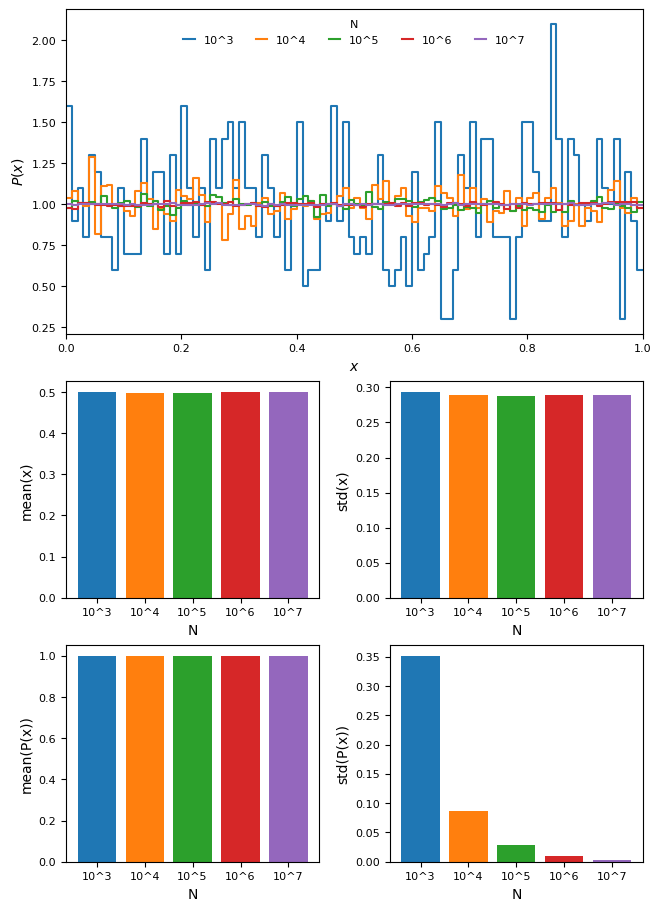

In [14]:
# Step 1: Create your bin edges
bin_edges = np.linspace(                      # Here, step is the size of each bin
                start=0,                      # start is the leftmost bin edge
                stop=1,                       # stop is the rightmost bin edge
                num=101                       # num is 1 greater than the number of bins you want
)

# Step 2: Create your histogram (using np.histogram)
histogram1, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data1, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram2, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data2, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram3, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data3, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram4, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data4, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram5, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data5, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)

# Step 3: Perform your analyses (not shown), and construct your dictionaries
distributions = {                             # This dictionary contains your histograms
    "xdata" : bin_edges,                      # put the edges of your histogram bins here
    "ydata" : [histogram1, histogram2, 
               histogram3, histogram4, 
               histogram5],                   # put your histograms in a list here
    "labels" : ["10^3", "10^4", "10^5", "10^6", "10^7"],              # put the names of your histograms here
    "label_title" : "N",                      # put the name of the parameter describing your labels here.
    "xrange" : (bin_edges[0], bin_edges[-1]), # put the bounds of your x-axis here
    "use_bin_centers" : False                 # keep False unless it's really necessary
}
mean_x = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
    "data" : [np.mean(data1), np.mean(data2), 
              np.mean(data3), np.mean(data4), 
              np.mean(data5)],                  # put the results of your analysis for each histogram here
    "ylabel" : "mean(x)"                         # put the label of your analysis result here
}
std_x = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
    "data" : [np.std(data1), np.std(data2), 
              np.std(data3), np.std(data4), 
              np.std(data5)],                  # put the results of your analysis for each histogram here
    "ylabel" : "std(x)"                         # put the label of your analysis result here
}
mean_px = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
    "data" : [np.mean(histogram1), np.mean(histogram2), 
              np.mean(histogram3), np.mean(histogram4), 
              np.mean(histogram5)],                  # put the results of your analysis for each histogram here
    "ylabel" : "mean(P(x))"                         # put the label of your analysis result here
}
std_px = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
    "data" : [np.std(histogram1), np.std(histogram2), 
              np.std(histogram3), np.std(histogram4), 
              np.std(histogram5)],                  # put the results of your analysis for each histogram here
    "ylabel" : "std(P(x))"                         # put the label of your analysis result here
}
distribution_plot(distributions=distributions, analysis1=mean_x, analysis2=std_x, 
                 analysis3=mean_px, analysis4=std_px)

### Task 1.3: COMMENT: What do you notice about the distributions of random numbers as you increase the number of random numbers generated? ###

*Enter your solution in the cell below*

***

## Problem 2: Generate a gaussian distribution of random numbers ##

### Background ###

Sometimes, it is advantageous to sample a gaussian rather than to sample a uniform distribution. For example, if you were generating random velocities for a system of gaseous particles we would expect their velocities to be gaussian. In this problem, you will learn one effective way to transform a uniform distribution of random numbers into a gaussian distribution of random numbers (by using the Box-Muller transformation).

#### The Box-Muller Transform ####

Given two independent samples of uniformly distributed random numbers, $U_1$ and $U_2$, you can find two corresponding standard normal distribution of random numbers:

$$Z_0 = \sqrt{-2\mathrm{ln}(U_1)}\; \mathrm{cos}(2\pi U_2)$$

$$Z_1 = \sqrt{-2\mathrm{ln}(U_1)}\; \mathrm{sin}(2\pi U_2)$$

### Task 2.1: Write a function that will generate a standard normal distribution of random numbers using the `numpy.random` library to generate a uniform distribution and then transforming it using the Box-Muller Transform. ###

*Write your solution in the cell below*

In [3]:
def box_muller(N):
    '''
    Generates N random numbers sampled from a standard normal distribution using the Box-Muller transform
    
    Parameters
    ----------
    N : int
        The number of random numbers to generate
        
    Returns
    -------
    random_numbers : np.ndarray(dtype=float, size=N)
        The random numbers sampled from a standard normal distribution
    '''
    U1 = np.random.default_rng().random(int(np.ceil(N/2)))
    U2 = np.random.default_rng().random(int(np.ceil(N/2)))
    
    Z0 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z1 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    
    random_numbers = np.hstack([Z0, Z1])[:N]
    
    return random_numbers

a = box_muller(13)
print(a)

[ 0.11137506 -0.68431552 -0.05402666  0.47147769 -1.45845342  1.049859
 -1.22630099  0.1886977   1.98200869 -0.60967254  0.69556495  1.2508161
  1.4690062 ]


### Task 2.2: Like with Problem 1, plot the probability distributions, $P(x)$, of various sizes of these normally distributed arrays. Analyze the first four moments of these distributions. ###

#### Further Instructions ####

You are allowed to use functions available in the numpy package to calculate the first moments; however, you should write the code to compute the other moments from scratch (e.g. you may use `np.mean` for $\overline{x}$, but may **not** use `np.std` for $\sigma(x)$). Select at least 1 metric for each moment to calculate for each distribution based on what you think makes most sense. Create a plot comparing these metrics for the distributions coming from each value of N.

Use the `distribution_plot()` function provided in **Additional Resources** to create your plot. If you would prefer to make the plot on your own, you may. 

*Write your solution in the cell below*

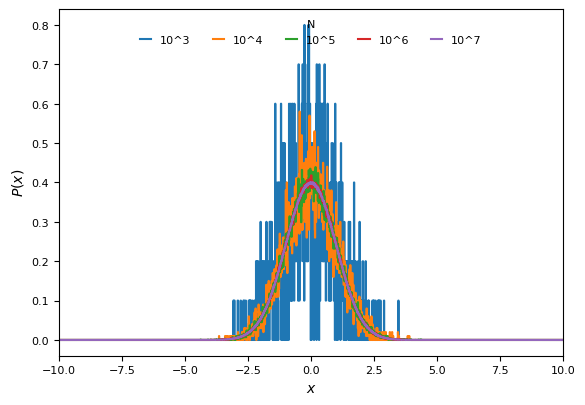

In [5]:
def stdev(x):
    '''
    Compute the standard deviation of the values in x
    
    Parameters
    ----------
    x : np.ndarray(dtype=float)
        The values to get the standard deviation of
    
    Returns
    -------
    float
        The standard deviation
    '''
    return np.sqrt((1/(x.size-1))*np.sum((x-np.mean(x))**2))

def skewness(x):
    '''
    Compute the skewness of the values in x
    
    Parameters
    ----------
    x : np.ndarray(dtype=float)
        The values to get the skewness of
    
    Returns
    -------
    float
        The skewness
    '''
    return (1/x.size)*np.sum(((x-np.mean(x))/stdev(x))**3)

def kurtosis(x):
    '''
    Compute the kurtosis of the values in x
    
    Parameters
    ----------
    x : np.ndarray(dtype=float)
        The values to get the kurtosis of
    
    Returns
    -------
    float
        The kurtosis
    '''
    return (1/x.size)*np.sum(((x-np.mean(x))/stdev(x))**4)

data1 = box_muller(1000)
data2 = box_muller(10000)
data3 = box_muller(100000)
data4 = box_muller(1000000)
data5 = box_muller(10000000)

# Step 1: Create your bin edges
bin_edges = np.linspace(                      # Here, step is the size of each bin
                start=-10,                      # start is the leftmost bin edge
                stop=10,                       # stop is the rightmost bin edge
                num=2001                       # num is 1 greater than the number of bins you want
)

# Step 2: Create your histogram (using np.histogram)
histogram1, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data1, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram2, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data2, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram3, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data3, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram4, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data4, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)
histogram5, _ = np.histogram(                 # The 2nd item returned is the bin_edges, which we already have
                data5, 
                bins=bin_edges, 
                density=True                  # This will return probability density
)

# Step 3: Perform your analyses (not shown), and construct your dictionaries
distributions = {                             # This dictionary contains your histograms
    "xdata" : bin_edges,                      # put the edges of your histogram bins here
    "ydata" : [histogram1, histogram2, 
               histogram3, histogram4, 
               histogram5],                   # put your histograms in a list here
    "labels" : ["10^3", "10^4", "10^5", "10^6", "10^7"],              # put the names of your histograms here
    "label_title" : "N",                      # put the name of the parameter describing your labels here.
    "xrange" : (bin_edges[0], bin_edges[-1]), # put the bounds of your x-axis here
    "use_bin_centers" : False                 # keep False unless it's really necessary
}
mean_x = {                                 # data1 and data2 correspond to random_array1/histogram1 and random_array2/histogram2, respectively.  
    "data" : [np.mean(data1), np.mean(data2), 
              np.mean(data3), np.mean(data4), 
              np.mean(data5)],                  # put the results of your analysis for each histogram here
    "ylabel" : "mean(x)"                         # put the label of your analysis result here
}

distribution_plot(distributions)

### Task 2.3: COMMENT: Are the results as you would expect? What do you notice as N grows large? ###

*Write your solution in the cell below*

***
## Problem 3: Comparing different kinds of distributions. ##

### Task 3.1: Using [`numpy.random.Generator.standard_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html), randomly sample a standard normal distribution and calculate its first through fourth moments. Like with problems 1 and 2, do this to generate 5 differently sized arrays. How do your results compare to those obtained in Problem 2 using the Box-Muller transform? ###

Use the `distribution_plot()` function provided in **Additional Resources** to create your plot. If you would prefer to make the plot on your own, you may.

*Write your solution in the cell below*

In [20]:
generator = np.random.default_rng()

data1 = generator.standard_normal(1000)



*Interpret your results in the cell below*

### Task 3.2: Using [`numpy.random.Generator.exponential`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html), randomly sample exponential distributions (with `scale=1`, `scale=2`, `scale=3`, `scale=4`, and `scale=5`) and calculate their first through fourth moments. Based on your results from past questions, generate enough numbers for what you believe to be adequate sampling. What metric would be best for describing the distribution's first moment? How do these distributions compare to the standard normal distribution? How does changing the scale parameter impact the distributions moments? ###

Use the `distribution_plot()` function provided in **Additional Resources** to create your plot. If you would prefer to make the plot on your own, you may. 

*Write your solution in the cell below*

In [ ]:
generator = np.random.default_rng()

data1 = generator.exponential(scale=1, 10000000)
data1 = generator.exponential(scale=2, 10000000)
data1 = generator.exponential(scale=3, 10000000)
data1 = generator.exponential(scale=4, 10000000)
data1 = generator.exponential(scale=5, 10000000)

*Interpret your results in the cell below*

***
## Additional Tasks: These are required for graduate students and optional for undergraduate students. Undergraduate students will recieve extra credit for completing them. ##

### Additional Task 1: Using [`numpy.random.Generator.poisson`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html), randomly sample poisson distributions (with $\lambda=1$, $\lambda=2$, $\lambda=3$, $\lambda=4$, and $\lambda=5$) and calculate their first through fourth moments. What metric would be best for describing the distributions first moment? How does this distribution compare to the standard normal and exponential distributions? What is the `lam` parameter? ###

Use the `distribution_plot()` function provided in **Additional Resources** to create your plot.

*Write your solution in the cell below*

*Interpret your results in the cell below*

### Additional Task 2: Either (a) build a random number generator of your choice from scratch, or (b) attempt to optimize the middle-square method function we built in class. Is there a faster way than by transforming the integer into a string and then slicing it? Can you prevent users from using obviously bad seed values? ###